In [1]:
# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

import numpy as np
from scipy import linalg

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.io import savemat

# font defaults for matplotlib
font = {'size'   : 18}
mpl.rc('font', **font)

In [2]:
runner = ra.runAUTO()
r1 = ac.run(e='algeg', c='algeq', runner=runner, UZSTOP = {1 : 0} )

Starting algeg ...

  BR    PT  TY  LAB    PAR(1)        L2-NORM         U(1)     
   1     1  EP    1   0.00000E+00   1.00000E+00   1.00000E+00
   1    33  LP    2   8.68661E-01   1.40189E+00   1.40189E+00
   1    50        3   4.68656E-01   1.78416E+00   1.78416E+00
   1    66  UZ    4   5.63430E-06   2.00000E+00   2.00000E+00

 Total Time    0.637E-01
algeg ... done


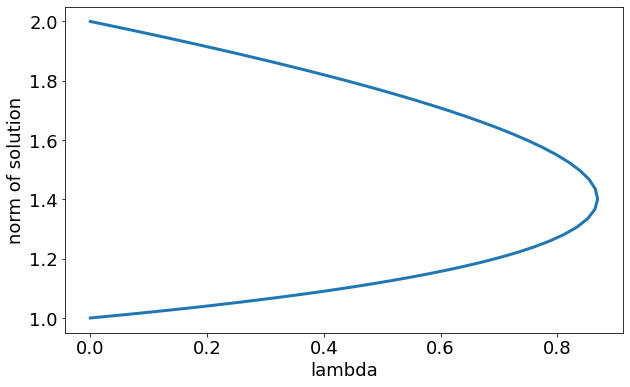

In [8]:
# bifurcation diagram
bd = r1
branches = [ 
         {  "par"        : br.coordarray[0,:], 
            "L2norm"     : br.coordarray[1,:],
            "branchnum"  : br.BR,
            "parS"       : np.array( [ bd(id).PAR(2) for id in br.getLabels() ] ),
            "u"          : np.array( [ bd(id)[0]['u'] for id in br.getLabels() ] ),
            "PT"         : np.array( [ br[ bd(id)['PT']-1 ]['PT'] for id in br.getLabels() ]  )
         } for br in bd ]

plt.figure(figsize=(10, 6))
for index, branch in enumerate(branches):
    bcolor = 'C'+str(index)
    plt.plot( branch['par'], branch['L2norm'], c=bcolor, linewidth=3)

plt.xlabel('lambda');
plt.ylabel('norm of solution');